# Applied Statistics Winter 2024 Tasks

**by Nur Bujang**

tasks.ipynb
***

# Task 1: Permutations and Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea.
Six have the milk in first and the other six having tea in first.
A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it.

You agree to accept their claim if they can tell which of the six cups in your experiment had the **milk in first**.

Calculate, using Python, the probability that they select the **correct six cups**.
Here you should assume that they have no special powers in figuring it out, that they are just guessing.
Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error.
Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.
Calculate the probability, assuming they have no special powers, that the person **makes at most one error**.

Would you accept two errors? Explain.

## Plan

- Set null and alternative hypothesis
- import libraries
- instantiate variables - totalcups, milkfirst, teafirst, allways
- Get all 6 correct - 1/all possibilities
    -math.comb - no repetition, no order
    - sixcorr, probsixcorr
- Get 5/6 (1 error) and 6/6 correct
    - fivecorronein, fivesixcorr, probfivesixcorr
- Get 4/6 correct (2 errors)
    - fourcorrtwoin, fourfivesixcorr, probfourfivesixcorr

## Methods and Implementation

Null Hypothesis assumes that the lady cannot tell the difference between tea first or milk first.

Alternative Hypothesis assumes that the lady can tell the difference between tea first or milk first.

In [47]:
# import library
import math # mathematical functions

alpha = 0.05

# instantiate variables
totalcups = 12
milkfirst = 6
teafirst = 6

sixcorr = math.comb(6,6)
sixcorr

1

I use math.comb <a href="https://docs.python.org/3/library/math.html#math.comb">(Python Software Foundation, 2024)</a> to pick k from n without repetition nor order, as shown also by <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

In [48]:
allways = math.comb(totalcups, milkfirst) # where k are picked from n
allways

924

In [49]:
# The probability that she randomly selects the correct 6 cups
probsixcorr = sixcorr / allways
probsixcorr

0.0010822510822510823

For guessing 6/6 cups correctly, the probability is 0.001 or 0.1%. 

In [50]:
# Ways that she randomly selects 5 correct cups, 1 error
fivecorronein = math.comb(6, 5) * math.comb(6, 1)
fivecorronein

36

In [51]:
# Ways that she makes 1 error + no error
fivesixcorr = fivecorronein + sixcorr
fivesixcorr

37

In [52]:
# The probability that she makes 1 error + no error
probfivesixcorr = fivesixcorr / allways
probfivesixcorr 

0.04004329004329004

In [53]:
# Print statement
if probfivesixcorr < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that the lady can tell the difference between tea first or milk first.")
    
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that the lady cannot tell the difference between tea first or milk first.")

Null Hypothesis is rejected. There is evidence to conclude that the lady can tell the difference between tea first or milk first.


For making at most one error, the probability is 0.04. Because $p$-value < $\alpha$, at the significance level, $\alpha$ = 0.05 <a href="https://en.wikipedia.org/wiki/Statistical_significance">(Wikipedia Contributors, 2019)</a>, we can reject the null hypothesis. There is evidence to conclude that the lady can tell the difference between tea first or milk first.

In [54]:
# The probability that she randomly selects 4 correct cups, 2 error
fourcorrtwoin = math.comb(6, 4) * math.comb(6, 2)
fourfivesixcorr = fourcorrtwoin + fivesixcorr

# The probability that she makes 2 error + 1 error + no error
probfourfivesixcorr = fourfivesixcorr / allways
probfourfivesixcorr

0.28354978354978355

In [55]:
# Print statement
if probfourfivesixcorr < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that the lady can tell the difference between tea first or milk first.")
    
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that the lady cannot tell the difference between tea first or milk first.")

Null Hypothesis cannot be rejected. We can continue to assume that the lady cannot tell the difference between tea first or milk first.


For at most two errors, the probability > $\alpha$. At significance level $\alpha$ = 0.05, we cannot reject the null hypothesis, so we continue to assume that the lady cannot tell the difference between tea first or milk first.

## Conclusion

For guessing six milk first cups correctly, the probability ($p$) is 0.001. For making at most 1 error, the $p$ is 0.04. At  significance level $\alpha$ = 0.05, $p$ < $\alpha$, so we can reject the null hypothesis. If the lady guesses at least five correct milk first cups, there is evidence to conclude that the lady can tell the difference between tea first or milk first.

If the lady makes 2 errors, the $p$ > $\alpha$, so we cannot reject the null hypothesis. Therefore, we continue to assume that the lady cannot tell the difference between tea first or milk first.

## References

McLloughlin, I. (2024). GitHub - ianmcloughlin/2425_applied_statistics. [online] GitHub. Available at: https://github.com/ianmcloughlin/2425_applied_statistics [Accessed 21 Oct. 2024].

Python Software Foundation (2024). math — Mathematical functions. [online] Python documentation. Available at: https://docs.python.org/3/library/math.html#math.comb [Accessed 21 Oct. 2024].

Wikipedia Contributors (2019). Statistical significance. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Statistical_significance [Accessed 21 Oct. 2024].

***

# Task 2: numpy's Normal Distribution

In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

## Plan

- import libraries - numpy, scipy.stats shapiro, normal, matplotlib
- instantiate variables - samplesize, mean, stddev, randsample
- generate 100000 values with numpy.random.normal
- Q-Q plot
- test for normality with scipy.stats.shapiro 
- plot a histogram with matplotlib
    - on top, plot probability density function  - numpy.linspace, scipy.stats.norm

## Methods and Implementation



In [56]:
# import libraries
import numpy as np # numerical arrays
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats # statistical functions
from scipy.stats import norm # statistical and probabilistic calculations related to the normal distribution

# instantiate variables
samplesize = 100000
mean = 10.0
stddev = 3.0

Then, generate 100000 values with numpy.random.normal <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">(NumPy Developer, n.d.)</a>

In [57]:
# Generate random values
randsample = np.random.normal(loc=10.0, scale=3.0, size=100000) # where loc = mean, scale=standard deviation, size=samplesize
randsample # must be an array of sample data

array([ 8.58412606, 11.5429892 , 17.96295669, ...,  8.59094634,
        7.9653736 ,  7.49961583])

Then, a Q-Q plot was generated using stats.probplot <a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html">(Perktold et al., 2009)</a> and as shown by <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a> to form the assumption that the data is normally distributed. The Q-Q plot compares the quantiles of the data with the quantiles of a theoretical distribution, which in this case is normal distribution <a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html">(Perktold et al., 2009)</a>.

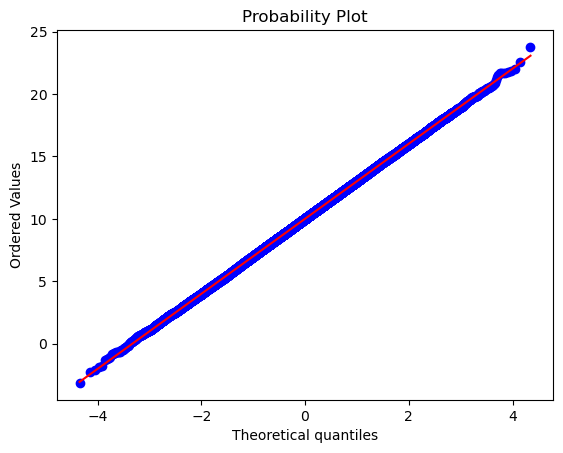

In [58]:
# Create an empty plot.
fig, ax = plt.subplots()

# Create a q-q plot.
stats.probplot(randsample, dist='norm', plot=ax); # normal distribution

The probability plot shows that the data mostly follows a straight line, thus suggesting that it approximately follows a normal distribution.

Next, the test for normality was performed with Shapiro-Wilk test <a href="https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html">The SciPy community (2024)</a>. It states that while the Shapiro-Wilk statistic is accurate (a value between 0 and 1 shows how well the data fits a normal distribution), the $p$-value may not be.

For Shapiro-Wilk test, the Null Hypothesis assumes that the data is normally distributed <a href="https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html">(The SciPy community, 2024)</a>. 

The Alternative Hypothesis assumes that data is not normally distributed.

In [59]:
shapirotest, pshapiro = stats.shapiro(randsample)
# warning: p-value may not be accurate for N > 5000.

# So test with subsample and compare results
shapirotest5k, pshapiro5k = stats.shapiro(randsample[:5000]) # try

shapirotest, pshapiro, shapirotest5k, pshapiro5k


(0.9999739943733852,
 0.7405157350410829,
 0.999544645622517,
 0.29072816630073567)

The chance of seeing the Shapiro-Wilk test value as extreme as 0.999 if the data are normally distributed is high (depending on the random values generated). 

In [60]:
# Print statement
if pshapiro < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that data is not normally distributed.")
else:
    print("Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed.")

Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed.


Both $p$-values are big for randsample and subsample. In this task, results from randsample will be used.

Because $p$-value > $\alpha$, Null Hypothesis cannot be rejected, as there is no evidence to suggest that data is not normally distributed. 

Next, a histogram was plotted according to <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">Hunter et al. (n.d.)</a>, <a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram">NumPy Developers (2024)</a> and <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

To generate he probability density function over the histogram, the limits were set according to <a href="https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.xlim.html">Hunter et al. (2017)</a>. Evenly-spaced values were generated with np.linspace <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html">(NumPy Developers, n.d.)</a>. The normal distribution was calculated with scipy.stats.norm <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html">(The SciPy community, n.d.)</a>. Finally, the line plot was created with plt.plot <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">(Hunter et al., n.d.)</a>.

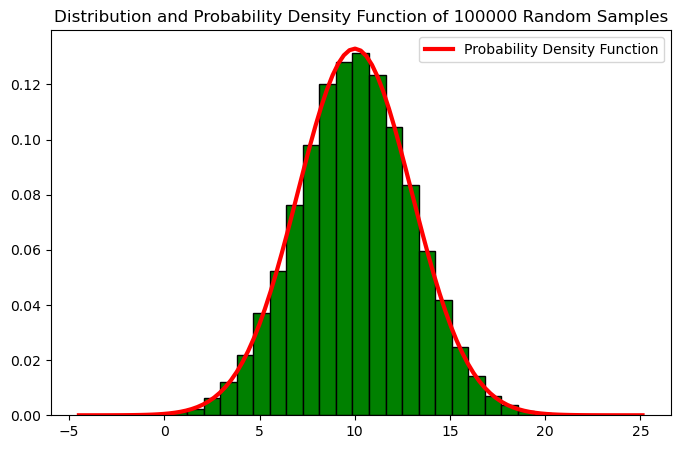

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot histogram
ax.hist(randsample, color='g', edgecolor='black', density=True, bins=31)

# Plot the corresponding normal distribution probability density function
xmin, xmax = plt.xlim() # set limits of the x-axis
x = np.linspace(xmin, xmax, 101) # generate 101 equally-spaced values
pdf = norm.pdf(x, mean, stddev) # probability density function line
plt.plot(x, pdf, 'r', linewidth=3, label="Probability Density Function") # line plot overlaying histogram
plt.legend() # display legend
plt.title('Distribution and Probability Density Function of 100000 Random Samples');

## Conclusion

The Q-Q plot suggests that the random sample approximately follows a normal distribution.There is no evidence to suggest that the random sample generated is not normally distributed according to Shapiro-Wilk test. A histogram with overlaying corresponding normal distribution probability density function was generated.

## References

Hunter, J., Dale, D., Firing, E., Droettboom, M. and Matplotlib development team (n.d.). matplotlib.pyplot.hist — Matplotlib 3.5.1 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html [Accessed 22 Oct. 2024].

Hunter, J., Dale, D., Firing, E., Droettboom, M. and Matplotlib development team (n.d.). matplotlib.pyplot.plot — Matplotlib 3.4.1 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html [Accessed 22 Oct. 2024].

Hunter, J., Dale, D., Firing, E., Droettboom, M. and Matplotlib development team (2017). matplotlib.pyplot.xlim — Matplotlib 2.1.2 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.xlim.html [Accessed 22 Oct. 2024].

McLloughlin, I. (2024). GitHub - ianmcloughlin/2425_applied_statistics. [online] GitHub. Available at: https://github.com/ianmcloughlin/2425_applied_statistics [Accessed 22 Oct. 2024].

NumPy Developer (n.d.). numpy.random.normal — NumPy v1.21 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html [Accessed 22 Oct. 2024].

NumPy Developers (2024). numpy.histogram — NumPy v2.1 Manual. [online] Numpy.org. Available at: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram [Accessed 24 Oct. 2024].

NumPy Developers (n.d.). numpy.linspace — NumPy v1.23 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html [Accessed 22 Oct. 2024].

Perktold, J., Seabold, S., Taylor, J. and statsmodels-developers (2009). statsmodels.graphics.gofplots.qqplot - statsmodels 0.14.1. [online] www.statsmodels.org. Available at: https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html [Accessed 5 Nov. 2024].

The SciPy community (n.d.). scipy.stats.norm — SciPy v1.5.4 Reference Guide. [online] docs.scipy.org. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html [Accessed 24 Oct. 2024].

The SciPy community (2024). shapiro — SciPy v1.15.0.dev Manual. [online] Github.io. Available at: https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html [Accessed 22 Oct. 2024].


***

# Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

## Plan

- Set null and alternative hypothesis
- import libraries - scipy.stats <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">(The SciPy community, 2019)</a> as also shown by <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>
- instantiate variables - before, after with np.array
- calculate paired t-statistic with python (manually?)
    - n
    - degfree
    - diff - bef - aft
    - sumdiff
    - diffsq
    - sumdiffsq
    - tcalc = (sumdiff / n) / (np.sqrt((sumdiffsq - (sumdiff**2 / n)) / np.multiply(degfree, n)))

- calculate paired t-statistic with scipy.stat- paired t-test (related because the values are from the same patients)
- compare the 2 results

## Methods and Implementation

Null Hypothesis assumes that before and after means are equal.

Alternative Hypothesis assumes that before and after means are not equal.

To enable comparison, the two sets of multiple values from the table are organized in a structured way using np.array <a href="https://numpy.org/doc/stable/reference/generated/numpy.array.html">(NumPy Developers, n.d.)</a>. Manual calculation of paired or dependent t-test was performed because the two sets of samples are related (the values are from the same patients) according to <a href="https://www.statisticshowto.com/probability-and-statistics/t-test/#PairedTTest">Statistics How To (n.d.)</a>. 
numpy.sum was calculated according to <a href="https://numpy.org/doc/stable/reference/generated/numpy.sum.html">NumPy Developers (n.d.)</a>.
numpy.square was done as shown by <a href="https://numpy.org/doc/stable/reference/generated/numpy.square.html">NumPy Developers (n.d.)</a>.
numpy.sqrt was performed as seen in <a href="https://www.codecademy.com/resources/docs/numpy/math-methods/sqrt">Maxwell (2024)</a>.
numpy.multiply was calculated according to <a href="https://numpy.org/devdocs/reference/generated/numpy.multiply.html">NumPy Developers (2024b)</a>.

In [62]:
# import libraries
import numpy as np # numerical arrays
import scipy.stats as stats # statistical functions

# instantiate variables
bef = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
aft = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

n = len(bef)
degfree = n - 1
diff = bef-aft
sumdiff = np.sum(diff)
sumdiffsq = np.sum(np.square(diff))

# manually calculate t-statistic value
tcalc = (sumdiff / n) / (np.sqrt((sumdiffsq - (sumdiff**2 / n)) / np.multiply(degfree, n)))
tcalc

1.337227482480628

Then, paired t-test was performed with scipy.stats.ttest_rel <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">(The SciPy community, n.d.)</a>. The 'alternative' was set to 'two-sided' because unless specified, I am only interested in any change between the two means.

In [63]:
# Perform related t-test
# two-sided because I am only interested in any change between the two means
tscipy, tpval = stats.ttest_rel(bef, aft, alternative='two-sided')
tscipy, tpval

(1.337227482480628, 0.21396011317404623)

Values from tcalc and ttest were compared using np.isclose <a href="https://numpy.org/doc/2.1/reference/generated/numpy.isclose.html">NumPy Developers (2024a)</a>. The 'atol' was set to 0 to see if the tcalc and tscipy values are identical.

In [64]:
# Print statement
if np.isclose(tcalc, tscipy, atol=0.0):
    print("Yes, tcalc and tscipy values are identical.")
else:
    print("No, tcalc and tscipy values are not identical")

Yes, tcalc and tscipy values are identical.


The tcalc and tscipy values are identical.

In [65]:
# Print statement
if tpval < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that before and after means are not equal.")
    
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that before and after means are equal.")

Null Hypothesis cannot be rejected. We can continue to assume that before and after means are equal.


 At significance level $\alpha$ = 0.05, the $p$-value of seeing the value as extreme as 1.337 is 21% (which is higher than treshold) that we cannot reject the null hypothesis, so we continue to assume that the means before and after exercise are equal.

## Conclusion

The t-statistic values from paired t-statistic using manual calculation and scipy.stat are identical. 

At significance level $\alpha$ = 0.05, the $p$-value of seeing the value as extreme as 1.337 is 21%. Therefore, because $p$-value (tpval) > $\alpha$, Null Hypothesis cannot be rejected. We can continue to assume that before and after exercise means are equal.

## References

Maxwell, K. (2024). Python:NumPy | Math Methods | .sqrt() | Codecademy. [online] Codecademy. Available at: https://www.codecademy.com/resources/docs/numpy/math-methods/sqrt [Accessed 26 Oct. 2024].

McLloughlin, I. (2024). GitHub - ianmcloughlin/2425_applied_statistics. [online] GitHub. Available at: https://github.com/ianmcloughlin/2425_applied_statistics [Accessed 23 Oct. 2024].

NumPy Developers (n.d.). numpy.array — NumPy v1.19 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/generated/numpy.array.html [Accessed 24 Oct. 2024].

NumPy Developers (2024a). numpy.isclose — NumPy v2.1 Manual. [online] Numpy.org. Available at: https://numpy.org/doc/2.1/reference/generated/numpy.isclose.html [Accessed 26 Oct. 2024].

NumPy Developers (2024b). numpy.multiply — NumPy v2.2.dev0 Manual. [online] Numpy.org. Available at: https://numpy.org/devdocs/reference/generated/numpy.multiply.html [Accessed 26 Oct. 2024].

NumPy Developers (n.d.). numpy.square — NumPy v1.23 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/generated/numpy.square.html [Accessed 26 Oct. 2024].

NumPy Developers (n.d.). numpy.sum — NumPy v1.19 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/generated/numpy.sum.html [Accessed 26 Oct. 2024].Statistics How To (n.d.). T Test (Student’s T-Test): Definition and Examples. [online] 

Statistics How To. Available at: https://www.statisticshowto.com/probability-and-statistics/t-test/#PairedTTest [Accessed 26 Oct. 2024].

The SciPy community (n.d.). scipy.stats.ttest_rel — SciPy v1.11.4 Manual. [online] docs.scipy.org. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel [Accessed 24 Oct. 2024].

The SciPy community (2019). Statistical functions (scipy.stats) — SciPy v1.3.3 reference guide. [online] Scipy.org. Available at: https://docs.scipy.org/doc/scipy/reference/stats.html [Accessed 23 Oct. 2024].

***

# Task 4: ANOVA

In this test we will estimate the probability of committing a Type II error in specific circumstances.
To begin, create a variable called `no_type_ii` and set it to `0`.

Now use a loop to perform the following test 10,000 times.

1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a Type II error occurs.

Summarize and explain your results.

## Plan

- Set null and alternative hypothesis
- import libraries - numpy
- instantiate variables - no_type_ii=0, reps=10000, size=100, stddev=0.1, alpha, one, two, three, means = [4.9, 5.0, 5.1]
- for loop
- one-way anova, if statement

## Methods and Implementation

Null Hypothesis assumes that all three samples have the same mean.

Alternative Hypothesis assumes that all three samples have different means.

In [66]:
# import libraries
import numpy as np # numerical arrays
import scipy.stats as stats # statistical functions

# instantiate variables
no_type_ii = 0
reps = 10000
samplesize = 100
stddev = 0.1
alpha = 0.05

means = [4.9, 5.0, 5.1]

Perform test 10000 times using for loop <a href="https://stackoverflow.com/questions/71625642/python-range-and-for-loop-understanding">(Stack Exchange Inc, 2022)</a> and range function <a href="https://pynative.com/python-range-function/">(Hule, 2019)</a>.

Generate with 100 values each using numpy.random.normal <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">(NumPy Developer, n.d.)</a> as also shown by <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

In [67]:
# Generate random values
for i in range(reps):
    one = np.random.normal(loc=means[0], scale=stddev, size=samplesize)
    two = np.random.normal(loc=means[1], scale=stddev, size=samplesize)
    three = np.random.normal(loc=means[2], scale=stddev, size=samplesize)

One-way ANOVA was performed on the three samples according to <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html">The SciPy community (2014)</a> by comparing the variance within each sample to the variance between samples. Type II error (false negative) occurs when we fail to reject null hypothesis when we should have been able to do so <a href="https://en.wikipedia.org/wiki/Type_I_and_type_II_errors">(Wikipedia, 2021)</a>. Type II error could happen because the difference in means is minute and could be hidden by within-group variability. Because we reject the null hypothesis if $p$-value is less than α = 0.05 <a href="https://en.wikipedia.org/wiki/One-way_analysis_of_variance">(Wikipedia Contributors, 2019)</a>, therefore, Type II error occurs when $p$-value is more than α.

In [68]:
# Perform one-way ANOVA
fstat,fpval = stats.f_oneway(one, two, three)

# Print statement
if fpval < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that samples one, two and three have different means.")
    
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that all three samples have the same mean.")

Null Hypothesis is rejected. There is evidence to conclude that samples one, two and three have different means.


Using one-way ANOVA, $p$-value < $\alpha$, so Null Hypothesis is rejected. There is evidence to conclude that samples one, two and three have different means.

In [69]:
# probability of committing a Type II error
if fpval > alpha:
        no_type_ii + 1
no_type_ii

0

The result 0 shows that no Type II errors occured across the three unrelated samples of 10000 runs. 

## Conclusion

Null Hypothesis is rejected with one-way ANOVA. There is evidence to conclude that samples one, two and three have different means. The result 0 shows that no Type II errors (False Negatives) occured across the three unrelated samples of 10000 runs. 

## References

Reference listHule, V. (2019). Python range() Explained with Examples. [online] PYnative. Available at: https://pynative.com/python-range-function/ [Accessed 23 Oct. 2024].

McLloughlin, I. (2024). GitHub - ianmcloughlin/2425_applied_statistics. [online] GitHub. Available at: https://github.com/ianmcloughlin/2425_applied_statistics [Accessed 22 Oct. 2024].

NumPy Developer (n.d.). numpy.random.normal — NumPy v1.21 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html [Accessed 23 Oct. 2024].

Stack Exchange Inc (2022). python range and for loop understanding. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/71625642/python-range-and-for-loop-understanding [Accessed 23 Oct. 2024].

The SciPy community (2014). scipy.stats.f_oneway — SciPy v1.3.1 Reference Guide. [online] Scipy.org. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html [Accessed 23 Oct. 2024].

Wikipedia Contributors (2019). One-way analysis of variance. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/One-way_analysis_of_variance [Accessed 27 Oct. 2024].

Wikipedia. (2021). Type I and type II errors. [online] Available at: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors [Accessed 27 Oct. 2024].

***

## End of tasks.ipynb